In [1]:
!pip install keras==2.2.4
!pip install tensorflow==1.14
!pip install tensorflow-gpu==1.14
!pip install numpy=1.16.1

     |████████████████████████████████| 312 kB 7.7 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.2.4 which is incompatible.
     |████████████████████████████████| 109.3 MB 48 kB/s 
     |████████████████████████████████| 488 kB 40.6 MB/s 
     |████████████████████████████████| 3.1 MB 22.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Unins

In [2]:
import keras
keras.__version__

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

'2.2.4'

In [3]:
!wget https://github.com/rickiepark/deep-learning-with-python-notebooks/archive/master.zip
!unzip master.zip
!mv deep-learning-with-python-notebooks-master/datasets ./

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9115_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9116_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9117_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9118_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9119_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/911_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9120_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9121_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9122_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsu

In [4]:
import os, shutil

데이터 출처 : https://www.kaggle.com/c/dogs-vs-cats/data

In [5]:
# 원본 데이터 경로
original_dataset_dir = '/content/datasets/cats_and_dogs/train'

# 저장 경로
base_dir = '/content/datasets/cats_and_dogs/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 이미 디렉토리가 존재하면 삭제하고 새로 만듬.
    shutil.rmtree(base_dir)  
os.mkdir(base_dir)

# 학습, 검증, 테스트 데이터 경로 설정
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [6]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print()
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print()
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000

검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500

테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # 입력 이미지의 크기는 150 x 150 x 3
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


feature map의 깊이(채널)는 layer를 거칠수록 증가 (32 -> 128로 깊어지며 보다 복잡한 표현 학습)

특성 맵의 크기(width, height)는 layer를 거칠수록 감소 (Flatten 층의 크기가 너무 커지지 않도록 함, bottelneck 방지)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### 데이터 전처리

JPEG 형식의 이미지 데이터를 딥러닝 모델이 입력으로 받을 수 있도록 부동 소수 타입의 텐서로 전처리

1. 사진 파일을 불러와서 RGB 픽셀 값 행렬로 디코딩
2. 부동 소수 타입의 텐서로 변환
3. 픽셀 값 스케일 정규화

In [12]:
# 이미지 파일을 전처리된 배치 텐서로 변환하는 제네레이터
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 스케일 조정 ([0, 255] -> [0, 1])
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # 학습 데이터 경로
        target_size=(150, 150),  # 모든 이미지를 150 × 150 크기로 
        batch_size=20,  # 배치 사이즈
        class_mode='binary')  # 이진 분류 문제

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


입력, 타깃 데이터의 배치를 무한히 반환하는 제네레이터 -> 종료를 위해 한 에포크에서 제네레이터로부터 몇 개의 데이터를 가져올건지 지정해야함 (steps_per_epoch=배치 사이즈)

20개의 이미지 샘플이 하나의 배치를 구성하고 전체 학습 데이터는 2000개이므로 한 에포크에서 모든 학습 데이터를 처리하려면 총 100개의 배치가 필요함 (steps_per_epoch = total # of train data / batch size = 2000 / 20 = 100)

마찬가지로 전체 검증데이터는 1000개 이므로 한 에포크에서 모든 검증 데이터를 처리하려면 총 50개의 배치가 필요함 (steps_per_epoch = total # of validation data / batch size = 1000 / 20 = 50)

In [16]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 14s 136ms/step - loss: 0.6901 - acc: 0.5420 - val_loss: 0.6702 - val_acc: 0.5970
Epoch 2/30
100/100 [==============================] - 9s 93ms/step - loss: 0.6572 - acc: 0.6145 - val_loss: 0.6423 - val_acc: 0.6220
Epoch 3/30
100/100 [==============================] - 9s 93ms/step - loss: 0.6064 - acc: 0.6700 - val_loss: 0.6264 - val_acc: 0.6300
Epoch 4/30
100/100 [==============================] - 9s 92ms/step - loss: 0.5688 - acc: 0.7040 - val_loss: 0.5876 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 9s 92ms/step - loss: 0.5405 - acc: 0.7285 - val_loss: 0.5759 - val_acc: 0.6950
Epoch 6/30
100/100 [==============================] - 9s 92ms/step - loss: 0.5048 - acc: 0.7510 - val_loss: 0.6076 - val_acc: 0.6590
Epoch 7/30
100/100 [==============================] - 9s 93ms/step - loss: 0.4872 - acc: 0.7655 - val_loss: 0.5795 - val_acc: 0.6840
Epoch 8/30
100/100 [==============================] - 9s 93ms/step 

In [17]:
model.save('cats_and_dogs_small_1.h5')  # 학습 완료된 모델 저장하기

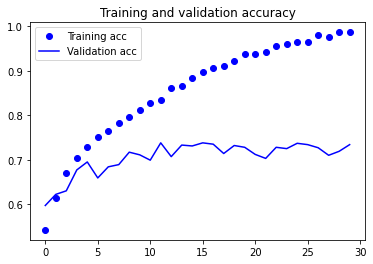

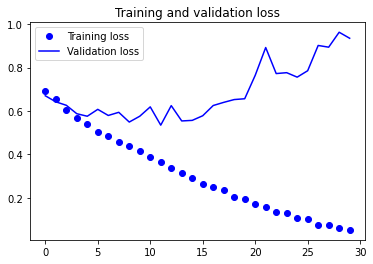

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

학습 데이터가 2000개로 굉장히 적기 때문에 과대적합이 발생함

### 데이터 증식

여러 가지 랜덤한 변환을 적용하여 샘플 늘리기 (학습 모델이 정확히 똑같은 데이터를 2벉 이상 만나지 않도록)

* rotation_range : 랜덤하게 사진을 회전시킬 각도 범위 (0-180 사이)
* width_shift_range, height_shift_range : 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위 (전체 넓이, 높이에 대한 비율).
* shear_range : 랜덤하게 전단 변환(shearing transformations)을 적용할 각도 범위
* zoom_range : 랜덤하게 사진을 확대할 범위
* horizontal_flip : 랜덤하게 이미지를 수평으로 뒤집음. 수평 대칭을 가정할 수 있을 때만 사용(ex 풍경/인물 사진).
* fill_mode : 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채우는 전략 (interpolation)

In [20]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

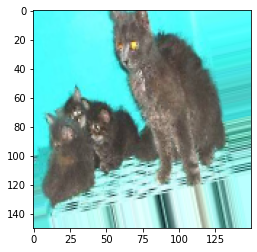

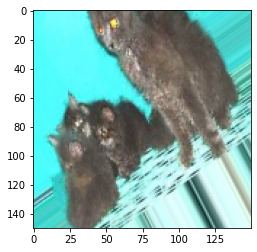

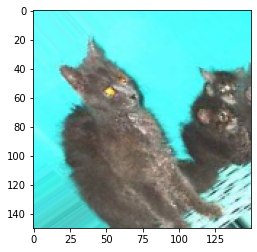

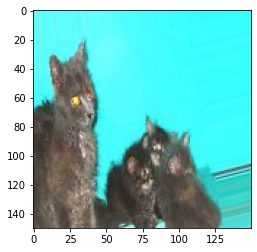

In [21]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지를 선택
img_path = fnames[4]
img = image.load_img(img_path, target_size=(150, 150))  # 150x150 사이즈로 불러오기

x = image.img_to_array(img)  # 넘파이 배열로 변환
x = x.reshape((1,) + x.shape)  # (1, 150, 150, 3) 형태로 변환 (배치 사이즈=1)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성
# 무한 반복되기 때문에 어느 지점에서 중지해야 함
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

해당 방법은 적은 수의 원본 이미지로부터 만들어졌기 때문에 여전히 데이터들 사이의 상호 연관성이 클 수밖에 없음.(이전에 없던 새로운 이미지를 만들지 못하고, 기존 정보의 재조합만 가능)

-> 과대 적합을 제거하기에 충분치 않을 수 있음

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [23]:
# 훈련 데이터 증식
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식 X
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 33s 327ms/step - loss: 0.6913 - acc: 0.5253 - val_loss: 0.6795 - val_acc: 0.5140
Epoch 2/100
100/100 [==============================] - 29s 291ms/step - loss: 0.6782 - acc: 0.5691 - val_loss: 0.6555 - val_acc: 0.6104
Epoch 3/100
100/100 [==============================] - 29s 293ms/step - loss: 0.6677 - acc: 0.5881 - val_loss: 0.6776 - val_acc: 0.5520
Epoch 4/100
100/100 [==============================] - 29s 290ms/step - loss: 0.6583 - acc: 0.5925 - val_loss: 0.7004 - val_acc: 0.5374
Epoch 5/100
100/100 [==============================] - 28s 280ms/step - loss: 0.6386 - acc: 0.6190 - val_loss: 0.6088 - val_acc: 0.6656
Epoch 6/100
100/100 [==============================] - 31s 308ms/step - loss: 0.6245 - acc: 0.6408 - val_loss: 0.6187 - val_acc: 0.6485
Epoch 7/100
100/100 [==============================] - 29s 293ms/step - loss: 0.6102 - acc: 0.6639 -

steps_per_epoch x epochs가 전체 데이터 사이즈보다 크면 오류가 발생 (steps_per_epoch를 적절히 맞춰야할 필요 o)

케라스는 2.3.1, 텐서플로는 2.2.0 버전을 사용하면 에러없이 정상적으로 수행

참고 : https://github.com/tensorflow/tensorflow/issues/25254

In [24]:
model.save('cats_and_dogs_small_2.h5')  # 모델 저장

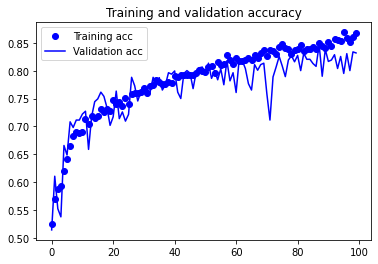

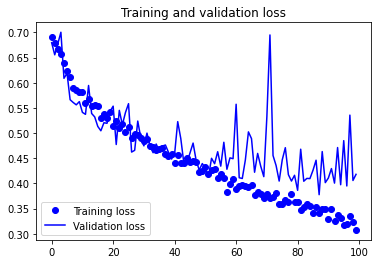

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()